<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.xkcd()

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [2]:

# Your code here
np.random.normal(loc=5, scale=2, size=10)

array([4.66417684, 4.32154167, 5.92462222, 8.0306359 , 1.31923815,
       0.30692964, 8.8556658 , 6.43073067, 6.48234516, 7.51436564])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

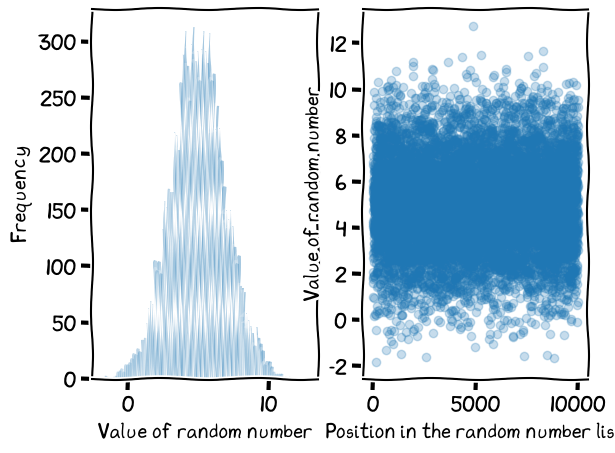

In [3]:

# Your code here
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:

# Your code here
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.30%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [5]:

# Your code here
    import numpy.random as rnd

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [6]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

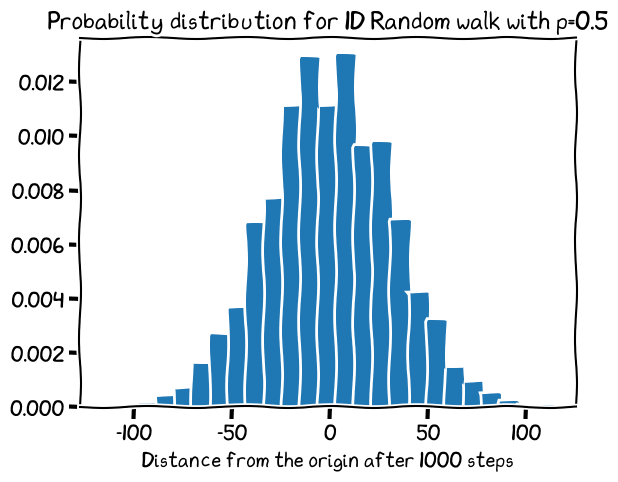

In [7]:

fig, ax = plt.subplots()
ax.hist(results, bins=25, density=True)
ax.set_xlabel(f'Distance from the origin after {no_of_steps} steps')
ax.set_title(f'Probability distribution for 1D Random walk with p={p}')

### 1.2 The simulation

In [8]:

# Your code here


### 1.3 What does theory say?

In [9]:

# Your code here
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

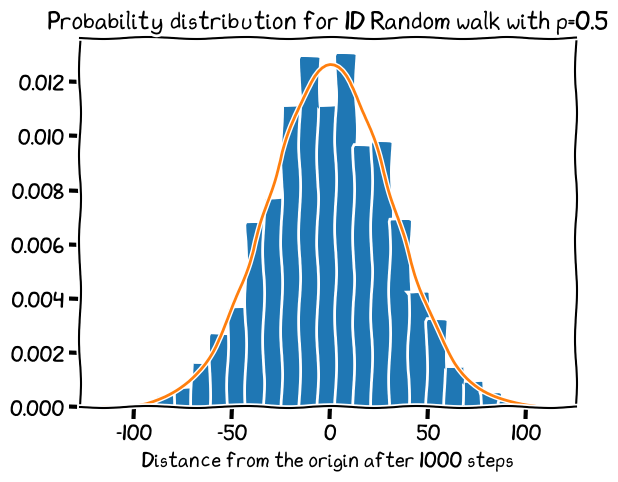

In [10]:
prob_right = .5
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
ax.plot(x, normal(x, mean, sd), label='Theoretical')
fig

## 2 Estimating $\pi$

### 2.1 The method

Basically, as we know the formulas for a circle and a square, we can embed a circle in a square, then find the ratio of the area of the circle to the area of the square by randomly generating points in the figure and calculating the fraction of points in the circle. The ratio of the area in the circle is proportional to $\pi$.

### 2.2 A poor but intuitive solution

In [11]:
# Your code here
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13368

### 2.3 A better solution

In [12]:
# Your code here
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.14044

Note that this better solution will generate a different variance from the original solution! This is because finding the variance of 1/4 of the circle is different from finding over the entire circle, since $Var(x_1) + Var(x_2)$ is different from $Var(2x)$.

### 2.4 A smarter solution

In [13]:

# Your code here
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.141568

## Exercise 1 :  Vital Stats of Random π

In [14]:
# Estimate-pi function
def estimate_pi(n_total=10000):
    x = rnd.rand(n_total)
    y = rnd.rand(n_total)
    n_circle = np.sum((x ** 2 + y ** 2) <= 1)

    return 4 * (n_circle / n_total)

In [15]:
# Repeating estimating pi with a list comprehension
estimate_pi_dataset = [estimate_pi(10000) for _ in range(100)]

In [16]:
# Estimating pi for n = 10000
dataset_mean = np.mean(estimate_pi_dataset)
dataset_sd = np.std(estimate_pi_dataset)
print(f"Mean: {dataset_mean}, Standard Deviation: {dataset_sd}")

Mean: 3.142456000000001, Standard Deviation: 0.015410440097544258


In [19]:
# Initialise Datasets
max_n_power = 6
estimate_pi_dataset = {"Inputs":[], "Means":[], "Standard Deviation":[]}

for i in range(1, max_n_power + 1):
    estimate_pi_dataset_temp = [estimate_pi(10 ** i) for _ in range(100)]

    estimate_pi_dataset["Inputs"].append(10 ** i)
    estimate_pi_dataset["Means"].append(np.mean(estimate_pi_dataset_temp))
    estimate_pi_dataset["Standard Deviation"].append(np.std(estimate_pi_dataset_temp))

/tmp/ipykernel_11384/2185545877.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


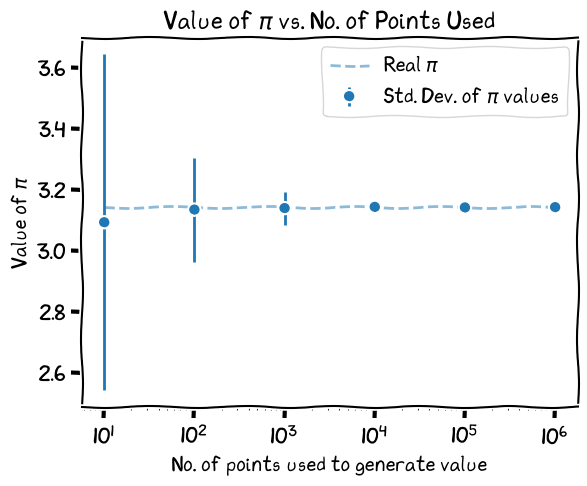

In [20]:
# Plot figure
fig, ax = plt.subplots()
ax.plot(estimate_pi_dataset["Inputs"], np.full(max_n_power, np.pi), linestyle="--", alpha=0.5, label="Real $\pi$")
ax.errorbar(estimate_pi_dataset["Inputs"], estimate_pi_dataset["Means"], estimate_pi_dataset["Standard Deviation"], fmt='o', color="#1f77b4", label="Std. Dev. of $\pi$ values")
ax.set_xscale('log')
ax.set_xlabel("No. of points used to generate value")
ax.set_ylabel("Value of $\pi$")
ax.set_title("Value of $\pi$ vs. No. of Points Used")
ax.legend()
fig.show()